# Part a

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
ai = 0.7
ao = 0.289
to = 293
ti = 260
def albedo(t):
    if t <= ti:
        return ai
    elif ti < t < to:
        return ao + (ai - ao) * ((t-to)**2/(ti-to)**2)
    elif t >= to:
        return ao

In [3]:
temp_range = np.linspace(250,300,100)
results = []
for t in temp_range:
    results.append(albedo(t))

Text(0.5, 1.0, 'Albedo Value as a Function of Global Mean Temperature of a Planet')

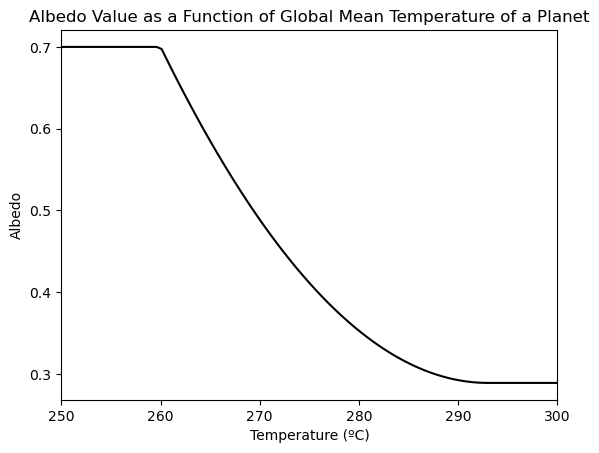

In [4]:
fig, ax = plt.subplots()
ax.margins(x = 0)
ax.plot(temp_range,results, 'k-')
ax.set_xlabel('Temperature (ºC)')
ax.set_ylabel('Albedo')
ax.set_title("Albedo Value as a Function of Global Mean Temperature of a Planet")

# Part (b)
#Now investigate a climate change scenario with this new model:

#Suppose that the emissivity changes from 0.78 to 0.80 (same as in class), representing additional CO2

#This time the albedo is not a fixed, known number. Instead, it varies with the current value of temperature according the formula you plotted in Part (a).

#Your task is to calculate the new equilibrium surface temperature. How much is the total warming now? (recall in class it was 1 degC)

#In this problem you will probably need to use a numerical solver, such as solve_ivp as we did in class.

In [12]:
solarconst = 1366
stefboltz = 5.67e-8
heatcap = 4.0e8 
M = 2
epsilon = 0.78
u = np.zeros((M,))


In [13]:
def eq_surface_temp(t,u):
    f = np.zeros((M,))
    f[0] = (solarconst * (1-albedo(t))/4 - epsilon * stefboltz * (u[0]**4) - (1-epsilon) * stefboltz * (u[1]**4))/heatcap
    f[1] = (solarconst * (1-albedo(t))/4 + epsilon * stefboltz * (u[0]**4) - stefboltz * (u[1]**4)) / heatcap
    return f
u0 = np.zeros((M,))
t0 = 0.0

In [14]:
Dt = 60*60*365*24
tmax = 100*Dt
t = np.arange(t0, tmax, Dt)
N = np.shape(t)[0]

Text(0, 0.5, 'Temperature (K)')

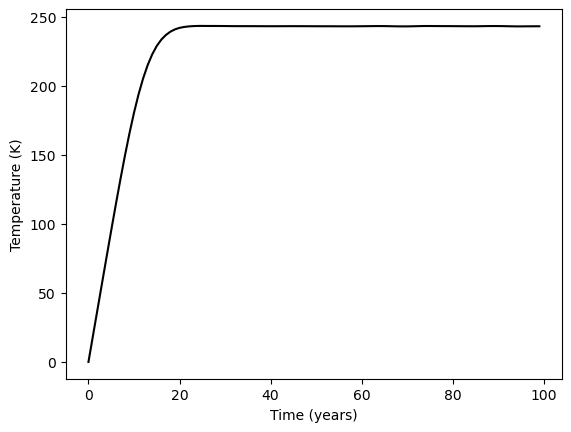

In [17]:
sol = solve_ivp(eq_surface_temp, [t0, tmax], u0, method = 'RK45', t_eval = t)
fig = plt.figure()
plt.plot(sol.t/(Dt), sol.y[0],'k-')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (K)')